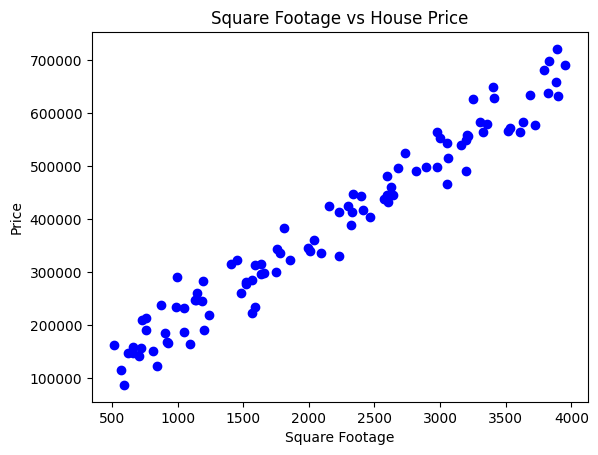

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a synthetic dataset
np.random.seed(42)
square_footage = np.random.uniform(500, 4000, 100)
bedrooms = np.random.randint(1, 6, 100)
age = np.random.randint(1, 50, 100)
prices = 50000 + (square_footage * 150) + (bedrooms * 10000) - (age * 500) + np.random.normal(0, 30000, 100)

# Create a DataFrame
df = pd.DataFrame({'SquareFootage': square_footage, 'Bedrooms': bedrooms, 'Age': age, 'Price': prices})

# Plot square footage vs price
plt.scatter(df['SquareFootage'], df['Price'], color='blue')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Square Footage vs House Price')
plt.show()


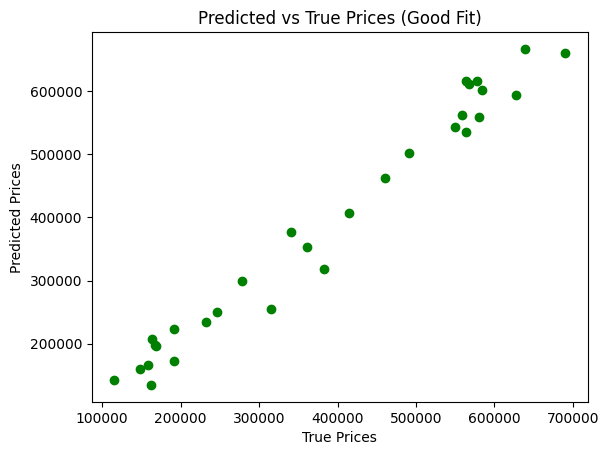

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features and target variable
X = df[['SquareFootage', 'Bedrooms', 'Age']]
y = df['Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Plot the predictions
plt.scatter(y_test, y_pred, color='green')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs True Prices (Good Fit)')
plt.show()


In [3]:
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 900264158.5697416
R² Score: 0.9733180345111128


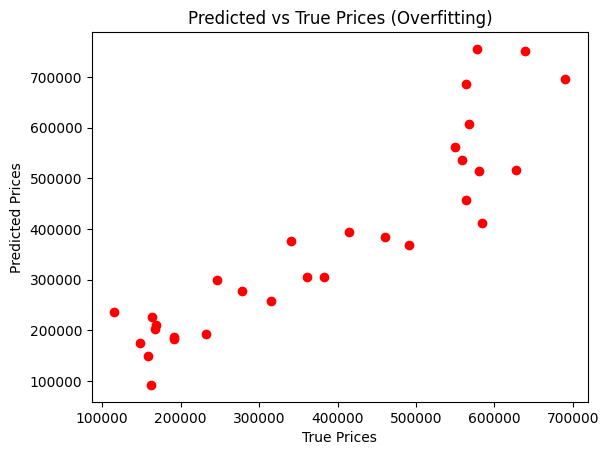

Mean Squared Error (Overfitted Model): 6226019360.885821
R² Score (Overfitted Model): 0.815473678321017


In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a polynomial model (degree 4 to induce overfitting)
poly_model = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())
poly_model.fit(X_train, y_train)

# Predict and plot
y_pred_poly = poly_model.predict(X_test)

plt.scatter(y_test, y_pred_poly, color='red')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs True Prices (Overfitting)')
plt.show()

# Evaluate the overfitted model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = poly_model.score(X_test, y_test)

print(f'Mean Squared Error (Overfitted Model): {mse_poly}')
print(f'R² Score (Overfitted Model): {r2_poly}')

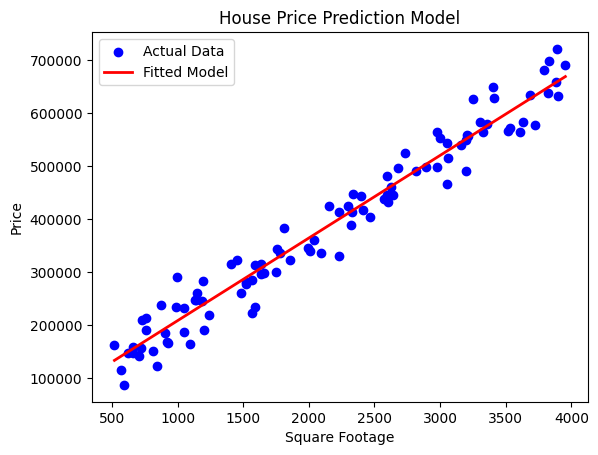

In [5]:
# Create a sequence of square footage values for the line plot
square_footage_range = np.linspace(df['SquareFootage'].min(), df['SquareFootage'].max(), 100)

# Set other features to their mean values
mean_bedrooms = df['Bedrooms'].mean()
mean_age = df['Age'].mean()

# Create a new DataFrame with the square footage range and fixed values for the other features
X_line = pd.DataFrame({
    'SquareFootage': square_footage_range,
    'Bedrooms': mean_bedrooms,
    'Age': mean_age
})

# Predict house prices for this range of square footage
y_line_pred = model.predict(X_line)

# Plot the original data points and the fitted line
plt.scatter(df['SquareFootage'], df['Price'], color='blue', label='Actual Data')
plt.plot(square_footage_range, y_line_pred, color='red', label='Fitted Model', linewidth=2)
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('House Price Prediction Model')
plt.legend()
plt.show()

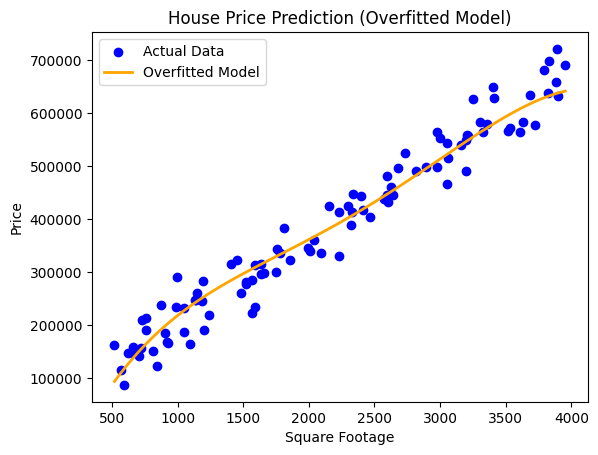

In [6]:
# Predict house prices for the square footage range using the overfitted polynomial model
y_line_pred_poly = poly_model.predict(X_line)

# Plot the original data points and the fitted overfitted model
plt.scatter(df['SquareFootage'], df['Price'], color='blue', label='Actual Data')
plt.plot(square_footage_range, y_line_pred_poly, color='orange', label='Overfitted Model', linewidth=2)
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('House Price Prediction (Overfitted Model)')
plt.legend()
plt.show()